In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris, load_breast_cancer, load_wine
from sklearn import tree
from sklearn.model_selection import train_test_split

# Todo: remove once have pip install
import sys  
sys.path.insert(0, 'C:\python_projects\RotationFeatures_project\RotationFeatures')
from RotationFeatures import RotationFeatures, GraphTwoDimTree # todo: fix once have pip install

np.random.seed(0)

## Constants used to control the examples shown

In [3]:
# Set to one of: "iris", "breast_cancer", or "wine"
DATASET_TESTED = "wine"

## Method to load data

In [4]:
def get_iris():
    iris = load_iris()
    X, y = iris.data, iris.target
    X = pd.DataFrame(X, columns=iris['feature_names'])
    y = pd.Series(y)
    return X, y

def get_breast_cancer():
    X, y = load_breast_cancer(return_X_y=True, as_frame=True)
    return X,y

def get_wine():
    X, y = load_wine(return_X_y=True, as_frame=True)
    return X,y

## Example using RotationFeatures with a decision tree on the Iris dataset

In [5]:
if DATASET_TESTED == "iris":
    X,y = get_iris()
elif DATASET_TESTED == "breast_cancer":
    X,y = get_breast_cancer()
elif DATASET_TESTED == "wine":
    X,y = get_wine()
else:
    assert False, "Not a valid test dataset"

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
rota = RotationFeatures(degree_increment=30)
rota.fit(X_train)
X_train_extended = rota.transform(X_train)
X_train_extended = pd.DataFrame(X_train_extended, index=X_train.index)
X_test_extended = rota.transform(X_test)

dt = tree.DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train_extended,y_train)
y_pred = dt.predict(X_test_extended)

## Presenting the features generated

In [6]:
display(X_train_extended)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,...,R_302,R_303,R_304,R_305,R_306,R_307,R_308,R_309,R_310,R_311
19,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,...,-0.483514,0.693665,0.095091,0.553246,-0.194271,0.526670,0.447212,0.756542,0.009026,0.878791
135,12.60,2.46,2.20,18.5,94.0,1.62,0.66,0.63,0.94,7.10,...,-0.017143,0.197413,-0.014424,0.349770,-0.187376,0.295697,-0.056721,0.325350,-0.211797,0.253401
74,11.96,1.09,2.30,21.0,101.0,3.38,2.14,0.13,1.65,3.21,...,-0.397732,0.673746,0.100698,0.594817,-0.210201,0.565475,0.357651,0.743168,-0.061850,0.822428
144,12.25,3.88,2.20,18.5,112.0,1.38,0.78,0.29,1.14,8.21,...,-0.184566,0.215121,-0.138417,0.427779,-0.333762,0.301259,0.011737,0.514470,-0.247071,0.451413
16,14.30,1.92,2.72,20.0,120.0,2.80,3.14,0.33,1.97,6.20,...,-0.211275,0.645049,0.000399,0.905291,-0.452300,0.784205,0.045868,0.931543,-0.426048,0.829674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,...,-0.200214,0.510363,0.254377,0.243167,0.098713,0.337777,0.329453,0.286513,0.142058,0.412854
67,12.37,1.17,1.92,19.6,78.0,2.11,2.00,0.27,1.04,4.68,...,-0.453205,0.834074,0.349150,0.386708,0.109019,0.509474,0.620906,0.543606,0.265917,0.781230
117,12.42,1.61,2.19,22.5,108.0,2.00,2.09,0.34,1.61,2.06,...,-0.313889,0.694424,0.371540,0.245363,0.199081,0.398261,0.522751,0.332665,0.286383,0.549471
47,13.90,1.68,2.12,16.0,101.0,3.10,3.39,0.21,2.14,6.10,...,-0.495365,0.651161,0.001402,0.630051,-0.313812,0.546341,0.381015,0.849221,-0.094642,0.925954


## Example Visualizing a Single Node

class_idx:  0
class_name:  0
match_ids:  [ True False False False  True False False  True False  True False False
 False False False False  True False False False False False False  True
 False False False  True  True False False False False False False False
 False False  True False False False False False False  True  True False
  True False  True False  True  True False  True False False  True False
 False  True False False False False  True False False  True  True False
 False  True  True False False  True  True  True False False  True False
 False  True False False False  True  True False  True False False  True
  True False  True False False False  True False False False  True False
 False False False False False False False  True False False False  True
  True False False False False  True  True  True False False False  True
 False]
ids_for_class:  Int64Index([19, 16, 40, 22, 27,  2, 43, 10, 50, 49, 48, 13, 23, 20, 15, 52,  3,
             6, 12, 14,  0, 46, 11, 35, 57, 41,  1, 

19    0.109166
16    0.044704
40    0.072812
22    0.182291
27    0.065703
2     0.098418
43    0.102685
10    0.105478
50   -0.009312
49   -0.093645
48    0.011064
13    0.187916
23    0.094704
20    0.089932
15   -0.071747
52    0.073638
3    -0.020008
6     0.020101
12    0.030935
14    0.025095
0     0.073851
46    0.145352
11    0.024812
35    0.101521
57    0.073244
41    0.116242
1     0.121085
42    0.165821
17    0.054902
38    0.152983
53   -0.016203
34    0.099217
28    0.144328
31    0.000624
32    0.150284
29    0.031690
25    0.167967
39    0.110695
58    0.081408
36    0.092596
21    0.058701
9    -0.029138
47    0.090319
Name: R_238, dtype: float64

class_idx:  1
class_name:  1
match_ids:  [False False  True False False False False False False False  True False
 False  True False False False  True False  True  True False  True False
  True  True  True False False  True  True False False  True  True  True
 False False False False  True  True  True  True  True False False  True
 False False False False False False  True False  True  True False False
  True False  True  True  True False False False False False False  True
 False False False  True  True False False False False  True False  True
 False False  True False False False False False False False  True False
 False  True False False  True False False False False False False  True
  True  True  True False False  True  True False  True False False False
 False False  True  True  True False False False  True  True  True False
 False]
ids_for_class:  Int64Index([ 74, 108,  71,  83,  97, 118,  62,  59,  95,  96, 109,  73, 110,
            125, 116,  89,  64, 122, 124,  69,  85,  78

74     0.112738
108    0.135133
71     0.210268
83    -0.088849
97     0.190691
118   -0.037387
62     0.015625
59    -0.034218
95     0.177691
96    -0.010639
109    0.273384
73     0.217072
110    0.202923
125    0.223972
116    0.123275
89     0.137263
64     0.072317
122    0.194708
124    0.279120
69     0.007841
85     0.125754
78     0.054356
100    0.110675
76    -0.006792
107    0.047984
68    -0.012746
75    -0.018015
84     0.135265
91    -0.052166
119    0.178899
102    0.138447
65     0.088009
120    0.209171
105    0.104552
128    0.240682
114    0.158581
127    0.143546
99     0.309950
82     0.101743
79     0.222721
115    0.214125
72     0.027703
77     0.028736
81     0.121385
88     0.074227
70    -0.046693
87     0.076773
103    0.121263
67    -0.017291
117    0.190070
Name: R_238, dtype: float64

class_idx:  2
class_name:  2
match_ids:  [False  True False  True False  True  True False  True False False  True
  True False  True  True False False  True False False  True False False
 False False False False False False False  True  True False False False
  True  True False  True False False False False False False False False
 False  True False  True False False False False False False False  True
 False False False False False  True False  True  True False False False
  True False False False False False False False  True False False False
  True False False  True  True False False  True False  True False False
 False False False  True False  True False  True  True  True False False
 False False False  True  True False False False False  True  True False
 False  True False False False False False False False False False False
  True]
ids_for_class:  Int64Index([135, 144, 131, 138, 158, 175, 145, 162, 156, 134, 163, 171, 159,
            166, 170, 155, 136, 165, 176, 130, 137, 152

135   -0.401005
144   -0.464678
131   -0.189760
138   -0.325078
158   -0.737585
175   -0.625486
145   -0.188756
162   -0.297862
156   -0.516147
134   -0.291314
163   -0.260404
171   -0.630841
159   -0.677329
166   -0.625786
170   -0.308770
155   -0.464707
136   -0.189905
165   -0.394588
176   -0.560511
130   -0.089112
137   -0.255004
152   -0.306204
153   -0.627725
173   -0.452986
143   -0.180087
132   -0.231806
154   -0.450184
133   -0.163261
139   -0.249093
149   -0.459338
157   -0.442795
142   -0.219206
150   -0.372701
147   -0.443175
148   -0.483253
177   -0.540890
167   -0.634507
169   -0.458584
140   -0.240737
172   -0.587010
Name: R_238, dtype: float64

class_idx:  0
class_name:  0
match_ids:  [ True False False False  True False False  True False  True False False
 False False False False  True False False False False False False  True
 False False False  True  True False False False False False False False
 False False  True False False False False False False  True  True False
  True False  True False  True  True False  True False False  True False
 False  True False False False False  True False False  True  True False
 False  True  True False False  True  True  True False False  True False
 False  True False False False  True  True False  True False False  True
  True False  True False False False  True False False False  True False
 False False False False False False False  True False False False  True
  True False False False False  True  True  True False False False  True
 False]
ids_for_class:  Int64Index([19, 16, 40, 22, 27,  2, 43, 10, 50, 49, 48, 13, 23, 20, 15, 52,  3,
             6, 12, 14,  0, 46, 11, 35, 57, 41,  1, 

19    0.109166
16    0.044704
40    0.072812
22    0.182291
27    0.065703
2     0.098418
43    0.102685
10    0.105478
50   -0.009312
49   -0.093645
48    0.011064
13    0.187916
23    0.094704
20    0.089932
15   -0.071747
52    0.073638
3    -0.020008
6     0.020101
12    0.030935
14    0.025095
0     0.073851
46    0.145352
11    0.024812
35    0.101521
57    0.073244
41    0.116242
1     0.121085
42    0.165821
17    0.054902
38    0.152983
53   -0.016203
34    0.099217
28    0.144328
31    0.000624
32    0.150284
29    0.031690
25    0.167967
39    0.110695
58    0.081408
36    0.092596
21    0.058701
9    -0.029138
47    0.090319
Name: R_238, dtype: float64

class_idx:  1
class_name:  1
match_ids:  [False False  True False False False False False False False  True False
 False  True False False False  True False  True  True False  True False
  True  True  True False False  True  True False False  True  True  True
 False False False False  True  True  True  True  True False False  True
 False False False False False False  True False  True  True False False
  True False  True  True  True False False False False False False  True
 False False False  True  True False False False False  True False  True
 False False  True False False False False False False False  True False
 False  True False False  True False False False False False False  True
  True  True  True False False  True  True False  True False False False
 False False  True  True  True False False False  True  True  True False
 False]
ids_for_class:  Int64Index([ 74, 108,  71,  83,  97, 118,  62,  59,  95,  96, 109,  73, 110,
            125, 116,  89,  64, 122, 124,  69,  85,  78

74     0.112738
108    0.135133
71     0.210268
83    -0.088849
97     0.190691
118   -0.037387
62     0.015625
59    -0.034218
95     0.177691
96    -0.010639
109    0.273384
73     0.217072
110    0.202923
125    0.223972
116    0.123275
89     0.137263
64     0.072317
122    0.194708
124    0.279120
69     0.007841
85     0.125754
78     0.054356
100    0.110675
76    -0.006792
107    0.047984
68    -0.012746
75    -0.018015
84     0.135265
91    -0.052166
119    0.178899
102    0.138447
65     0.088009
120    0.209171
105    0.104552
128    0.240682
114    0.158581
127    0.143546
99     0.309950
82     0.101743
79     0.222721
115    0.214125
72     0.027703
77     0.028736
81     0.121385
88     0.074227
70    -0.046693
87     0.076773
103    0.121263
67    -0.017291
117    0.190070
Name: R_238, dtype: float64

class_idx:  2
class_name:  2
match_ids:  [False  True False  True False  True  True False  True False False  True
  True False  True  True False False  True False False  True False False
 False False False False False False False  True  True False False False
  True  True False  True False False False False False False False False
 False  True False  True False False False False False False False  True
 False False False False False  True False  True  True False False False
  True False False False False False False False  True False False False
  True False False  True  True False False  True False  True False False
 False False False  True False  True False  True  True  True False False
 False False False  True  True False False False False  True  True False
 False  True False False False False False False False False False False
  True]
ids_for_class:  Int64Index([135, 144, 131, 138, 158, 175, 145, 162, 156, 134, 163, 171, 159,
            166, 170, 155, 136, 165, 176, 130, 137, 152

135   -0.401005
144   -0.464678
131   -0.189760
138   -0.325078
158   -0.737585
175   -0.625486
145   -0.188756
162   -0.297862
156   -0.516147
134   -0.291314
163   -0.260404
171   -0.630841
159   -0.677329
166   -0.625786
170   -0.308770
155   -0.464707
136   -0.189905
165   -0.394588
176   -0.560511
130   -0.089112
137   -0.255004
152   -0.306204
153   -0.627725
173   -0.452986
143   -0.180087
132   -0.231806
154   -0.450184
133   -0.163261
139   -0.249093
149   -0.459338
157   -0.442795
142   -0.219206
150   -0.372701
147   -0.443175
148   -0.483253
177   -0.540890
167   -0.634507
169   -0.458584
140   -0.240737
172   -0.587010
Name: R_238, dtype: float64

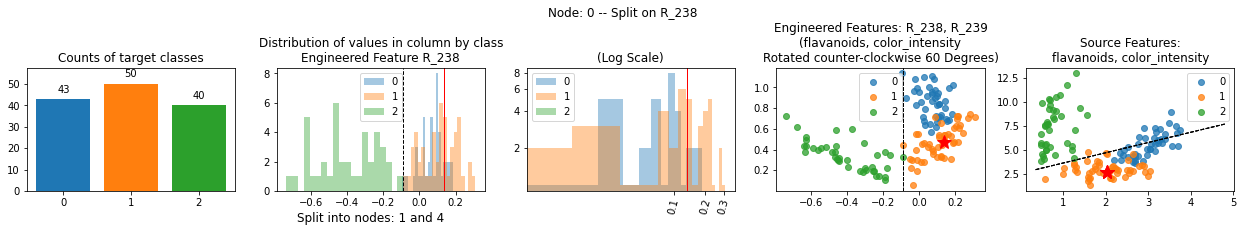

In [7]:
tree_viewer = GraphTwoDimTree(tree = dt, 
                              X_orig = X_train, 
                              X_extended = X_train_extended, 
                              y = y_train,
                              rota = rota)

tree_viewer.graph_node(node_idx =0, 
                       row=X_train_extended.iloc[10], 
                       show_log_scale=True)

## Example Visualizing the Decision Path for a Single Prediction

In [8]:
#tree_viewer.graph_decision_path(row=X_train_extended.iloc[2], show_log_scale=False)

## Example Showing Incorrect Predictions

Number of rows: 45. Number of incorrect: 5. Percent incorrect: 11


****************************************************************
Displaying decision path for row 55. Predicted: 2. Actual: 0
****************************************************************
Decision Path: [0 1 3]
class_idx:  0
class_name:  0
match_ids:  [ True False False False  True False False  True False  True False False
 False False False False  True False False False False False False  True
 False False False  True  True False False False False False False False
 False False  True False False False False False False  True  True False
  True False  True False  True  True False  True False False  True False
 False  True False False False False  True False False  True  True False
 False  True  True False False  True  True  True False False  True False
 False  True False False False  True  True False  True False False  True
  True False  True False False False  True False False False  True False
 False False False F

19    0.109166
16    0.044704
40    0.072812
22    0.182291
27    0.065703
2     0.098418
43    0.102685
10    0.105478
50   -0.009312
49   -0.093645
48    0.011064
13    0.187916
23    0.094704
20    0.089932
15   -0.071747
52    0.073638
3    -0.020008
6     0.020101
12    0.030935
14    0.025095
0     0.073851
46    0.145352
11    0.024812
35    0.101521
57    0.073244
41    0.116242
1     0.121085
42    0.165821
17    0.054902
38    0.152983
53   -0.016203
34    0.099217
28    0.144328
31    0.000624
32    0.150284
29    0.031690
25    0.167967
39    0.110695
58    0.081408
36    0.092596
21    0.058701
9    -0.029138
47    0.090319
Name: R_238, dtype: float64

class_idx:  1
class_name:  1
match_ids:  [False False  True False False False False False False False  True False
 False  True False False False  True False  True  True False  True False
  True  True  True False False  True  True False False  True  True  True
 False False False False  True  True  True  True  True False False  True
 False False False False False False  True False  True  True False False
  True False  True  True  True False False False False False False  True
 False False False  True  True False False False False  True False  True
 False False  True False False False False False False False  True False
 False  True False False  True False False False False False False  True
  True  True  True False False  True  True False  True False False False
 False False  True  True  True False False False  True  True  True False
 False]
ids_for_class:  Int64Index([ 74, 108,  71,  83,  97, 118,  62,  59,  95,  96, 109,  73, 110,
            125, 116,  89,  64, 122, 124,  69,  85,  78

74     0.112738
108    0.135133
71     0.210268
83    -0.088849
97     0.190691
118   -0.037387
62     0.015625
59    -0.034218
95     0.177691
96    -0.010639
109    0.273384
73     0.217072
110    0.202923
125    0.223972
116    0.123275
89     0.137263
64     0.072317
122    0.194708
124    0.279120
69     0.007841
85     0.125754
78     0.054356
100    0.110675
76    -0.006792
107    0.047984
68    -0.012746
75    -0.018015
84     0.135265
91    -0.052166
119    0.178899
102    0.138447
65     0.088009
120    0.209171
105    0.104552
128    0.240682
114    0.158581
127    0.143546
99     0.309950
82     0.101743
79     0.222721
115    0.214125
72     0.027703
77     0.028736
81     0.121385
88     0.074227
70    -0.046693
87     0.076773
103    0.121263
67    -0.017291
117    0.190070
Name: R_238, dtype: float64

class_idx:  2
class_name:  2
match_ids:  [False  True False  True False  True  True False  True False False  True
  True False  True  True False False  True False False  True False False
 False False False False False False False  True  True False False False
  True  True False  True False False False False False False False False
 False  True False  True False False False False False False False  True
 False False False False False  True False  True  True False False False
  True False False False False False False False  True False False False
  True False False  True  True False False  True False  True False False
 False False False  True False  True False  True  True  True False False
 False False False  True  True False False False False  True  True False
 False  True False False False False False False False False False False
  True]
ids_for_class:  Int64Index([135, 144, 131, 138, 158, 175, 145, 162, 156, 134, 163, 171, 159,
            166, 170, 155, 136, 165, 176, 130, 137, 152

135   -0.401005
144   -0.464678
131   -0.189760
138   -0.325078
158   -0.737585
175   -0.625486
145   -0.188756
162   -0.297862
156   -0.516147
134   -0.291314
163   -0.260404
171   -0.630841
159   -0.677329
166   -0.625786
170   -0.308770
155   -0.464707
136   -0.189905
165   -0.394588
176   -0.560511
130   -0.089112
137   -0.255004
152   -0.306204
153   -0.627725
173   -0.452986
143   -0.180087
132   -0.231806
154   -0.450184
133   -0.163261
139   -0.249093
149   -0.459338
157   -0.442795
142   -0.219206
150   -0.372701
147   -0.443175
148   -0.483253
177   -0.540890
167   -0.634507
169   -0.458584
140   -0.240737
172   -0.587010
Name: R_238, dtype: float64

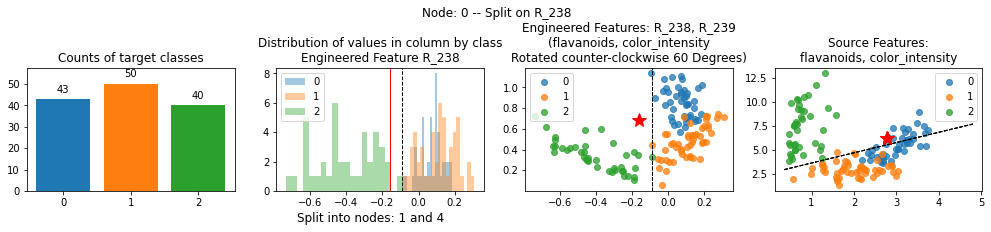

class_idx:  0
class_name:  0
match_ids:  [False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False]
ids_for_class:  Int64Index([49], dtype='int64')


49   -0.165864
Name: R_140, dtype: float64

class_idx:  1
class_name:  1
match_ids:  [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False]
ids_for_class:  Int64Index([], dtype='int64')


Series([], Name: R_140, dtype: float64)

class_idx:  2
class_name:  2
match_ids:  [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
ids_for_class:  Int64Index([135, 144, 131, 138, 158, 175, 145, 162, 156, 134, 163, 171, 159,
            166, 170, 155, 136, 165, 176, 130, 137, 152, 153, 173, 143, 132,
            154, 133, 139, 149, 157, 142, 150, 147, 148, 177, 167, 169, 140,
            172],
           dtype='int64')


135    0.323608
144    0.305259
131    0.304942
138    0.395771
158    0.514383
175    0.385981
145    0.452029
162    0.489024
156    0.342254
134    0.291200
163    0.317492
171    0.391184
159    0.434891
166    0.484735
170    0.371922
155    0.484437
136    0.464261
165    0.531222
176    0.387510
130    0.211074
137    0.622945
152    0.541290
153    0.297614
173    0.420534
143    0.369162
132    0.503381
154    0.402801
133    0.374960
139    0.578305
149    0.345909
157    0.715284
142    0.568217
150    0.429987
147    0.459058
148    0.442239
177    0.576160
167    0.368248
169    0.567899
140    0.459674
172    0.384452
Name: R_140, dtype: float64

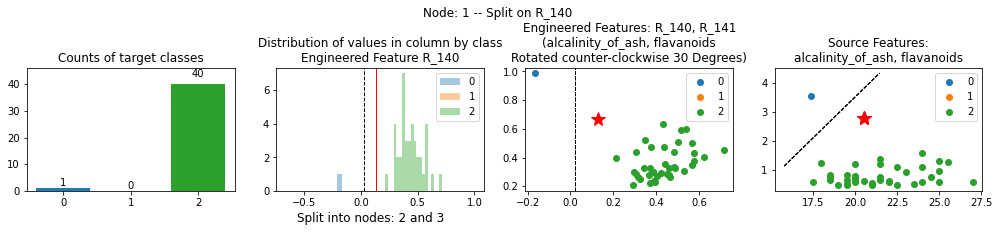

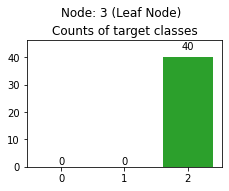



****************************************************************
Displaying decision path for row 61. Predicted: 2. Actual: 1
****************************************************************
Decision Path: [0 1 3]
class_idx:  0
class_name:  0
match_ids:  [ True False False False  True False False  True False  True False False
 False False False False  True False False False False False False  True
 False False False  True  True False False False False False False False
 False False  True False False False False False False  True  True False
  True False  True False  True  True False  True False False  True False
 False  True False False False False  True False False  True  True False
 False  True  True False False  True  True  True False False  True False
 False  True False False False  True  True False  True False False  True
  True False  True False False False  True False False False  True False
 False False False False False False False  True False False False  True
  True False 

19    0.109166
16    0.044704
40    0.072812
22    0.182291
27    0.065703
2     0.098418
43    0.102685
10    0.105478
50   -0.009312
49   -0.093645
48    0.011064
13    0.187916
23    0.094704
20    0.089932
15   -0.071747
52    0.073638
3    -0.020008
6     0.020101
12    0.030935
14    0.025095
0     0.073851
46    0.145352
11    0.024812
35    0.101521
57    0.073244
41    0.116242
1     0.121085
42    0.165821
17    0.054902
38    0.152983
53   -0.016203
34    0.099217
28    0.144328
31    0.000624
32    0.150284
29    0.031690
25    0.167967
39    0.110695
58    0.081408
36    0.092596
21    0.058701
9    -0.029138
47    0.090319
Name: R_238, dtype: float64

class_idx:  1
class_name:  1
match_ids:  [False False  True False False False False False False False  True False
 False  True False False False  True False  True  True False  True False
  True  True  True False False  True  True False False  True  True  True
 False False False False  True  True  True  True  True False False  True
 False False False False False False  True False  True  True False False
  True False  True  True  True False False False False False False  True
 False False False  True  True False False False False  True False  True
 False False  True False False False False False False False  True False
 False  True False False  True False False False False False False  True
  True  True  True False False  True  True False  True False False False
 False False  True  True  True False False False  True  True  True False
 False]
ids_for_class:  Int64Index([ 74, 108,  71,  83,  97, 118,  62,  59,  95,  96, 109,  73, 110,
            125, 116,  89,  64, 122, 124,  69,  85,  78

74     0.112738
108    0.135133
71     0.210268
83    -0.088849
97     0.190691
118   -0.037387
62     0.015625
59    -0.034218
95     0.177691
96    -0.010639
109    0.273384
73     0.217072
110    0.202923
125    0.223972
116    0.123275
89     0.137263
64     0.072317
122    0.194708
124    0.279120
69     0.007841
85     0.125754
78     0.054356
100    0.110675
76    -0.006792
107    0.047984
68    -0.012746
75    -0.018015
84     0.135265
91    -0.052166
119    0.178899
102    0.138447
65     0.088009
120    0.209171
105    0.104552
128    0.240682
114    0.158581
127    0.143546
99     0.309950
82     0.101743
79     0.222721
115    0.214125
72     0.027703
77     0.028736
81     0.121385
88     0.074227
70    -0.046693
87     0.076773
103    0.121263
67    -0.017291
117    0.190070
Name: R_238, dtype: float64

class_idx:  2
class_name:  2
match_ids:  [False  True False  True False  True  True False  True False False  True
  True False  True  True False False  True False False  True False False
 False False False False False False False  True  True False False False
  True  True False  True False False False False False False False False
 False  True False  True False False False False False False False  True
 False False False False False  True False  True  True False False False
  True False False False False False False False  True False False False
  True False False  True  True False False  True False  True False False
 False False False  True False  True False  True  True  True False False
 False False False  True  True False False False False  True  True False
 False  True False False False False False False False False False False
  True]
ids_for_class:  Int64Index([135, 144, 131, 138, 158, 175, 145, 162, 156, 134, 163, 171, 159,
            166, 170, 155, 136, 165, 176, 130, 137, 152

135   -0.401005
144   -0.464678
131   -0.189760
138   -0.325078
158   -0.737585
175   -0.625486
145   -0.188756
162   -0.297862
156   -0.516147
134   -0.291314
163   -0.260404
171   -0.630841
159   -0.677329
166   -0.625786
170   -0.308770
155   -0.464707
136   -0.189905
165   -0.394588
176   -0.560511
130   -0.089112
137   -0.255004
152   -0.306204
153   -0.627725
173   -0.452986
143   -0.180087
132   -0.231806
154   -0.450184
133   -0.163261
139   -0.249093
149   -0.459338
157   -0.442795
142   -0.219206
150   -0.372701
147   -0.443175
148   -0.483253
177   -0.540890
167   -0.634507
169   -0.458584
140   -0.240737
172   -0.587010
Name: R_238, dtype: float64

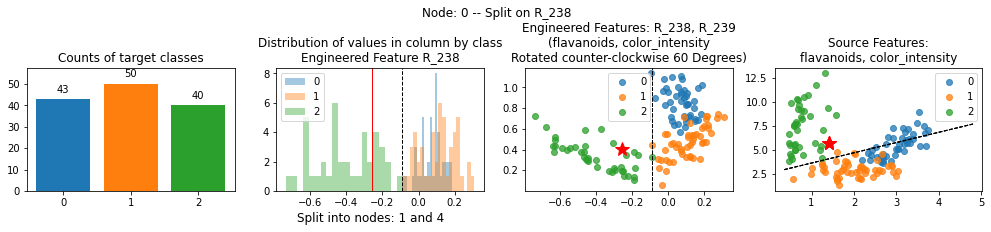

class_idx:  0
class_name:  0
match_ids:  [False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False]
ids_for_class:  Int64Index([49], dtype='int64')


49   -0.165864
Name: R_140, dtype: float64

class_idx:  1
class_name:  1
match_ids:  [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False]
ids_for_class:  Int64Index([], dtype='int64')


Series([], Name: R_140, dtype: float64)

class_idx:  2
class_name:  2
match_ids:  [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
ids_for_class:  Int64Index([135, 144, 131, 138, 158, 175, 145, 162, 156, 134, 163, 171, 159,
            166, 170, 155, 136, 165, 176, 130, 137, 152, 153, 173, 143, 132,
            154, 133, 139, 149, 157, 142, 150, 147, 148, 177, 167, 169, 140,
            172],
           dtype='int64')


135    0.323608
144    0.305259
131    0.304942
138    0.395771
158    0.514383
175    0.385981
145    0.452029
162    0.489024
156    0.342254
134    0.291200
163    0.317492
171    0.391184
159    0.434891
166    0.484735
170    0.371922
155    0.484437
136    0.464261
165    0.531222
176    0.387510
130    0.211074
137    0.622945
152    0.541290
153    0.297614
173    0.420534
143    0.369162
132    0.503381
154    0.402801
133    0.374960
139    0.578305
149    0.345909
157    0.715284
142    0.568217
150    0.429987
147    0.459058
148    0.442239
177    0.576160
167    0.368248
169    0.567899
140    0.459674
172    0.384452
Name: R_140, dtype: float64

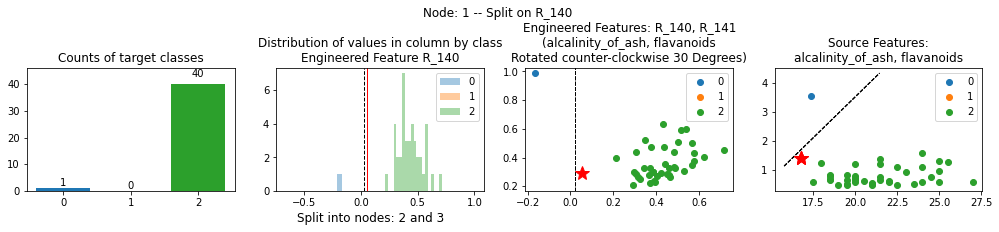

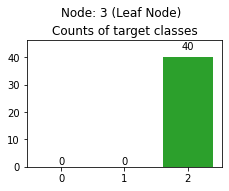



****************************************************************
Displaying decision path for row 4. Predicted: 1. Actual: 0
****************************************************************
Decision Path: [0 4 6 7]
class_idx:  0
class_name:  0
match_ids:  [ True False False False  True False False  True False  True False False
 False False False False  True False False False False False False  True
 False False False  True  True False False False False False False False
 False False  True False False False False False False  True  True False
  True False  True False  True  True False  True False False  True False
 False  True False False False False  True False False  True  True False
 False  True  True False False  True  True  True False False  True False
 False  True False False False  True  True False  True False False  True
  True False  True False False False  True False False False  True False
 False False False False False False False  True False False False  True
  True False

19    0.109166
16    0.044704
40    0.072812
22    0.182291
27    0.065703
2     0.098418
43    0.102685
10    0.105478
50   -0.009312
49   -0.093645
48    0.011064
13    0.187916
23    0.094704
20    0.089932
15   -0.071747
52    0.073638
3    -0.020008
6     0.020101
12    0.030935
14    0.025095
0     0.073851
46    0.145352
11    0.024812
35    0.101521
57    0.073244
41    0.116242
1     0.121085
42    0.165821
17    0.054902
38    0.152983
53   -0.016203
34    0.099217
28    0.144328
31    0.000624
32    0.150284
29    0.031690
25    0.167967
39    0.110695
58    0.081408
36    0.092596
21    0.058701
9    -0.029138
47    0.090319
Name: R_238, dtype: float64

class_idx:  1
class_name:  1
match_ids:  [False False  True False False False False False False False  True False
 False  True False False False  True False  True  True False  True False
  True  True  True False False  True  True False False  True  True  True
 False False False False  True  True  True  True  True False False  True
 False False False False False False  True False  True  True False False
  True False  True  True  True False False False False False False  True
 False False False  True  True False False False False  True False  True
 False False  True False False False False False False False  True False
 False  True False False  True False False False False False False  True
  True  True  True False False  True  True False  True False False False
 False False  True  True  True False False False  True  True  True False
 False]
ids_for_class:  Int64Index([ 74, 108,  71,  83,  97, 118,  62,  59,  95,  96, 109,  73, 110,
            125, 116,  89,  64, 122, 124,  69,  85,  78

74     0.112738
108    0.135133
71     0.210268
83    -0.088849
97     0.190691
118   -0.037387
62     0.015625
59    -0.034218
95     0.177691
96    -0.010639
109    0.273384
73     0.217072
110    0.202923
125    0.223972
116    0.123275
89     0.137263
64     0.072317
122    0.194708
124    0.279120
69     0.007841
85     0.125754
78     0.054356
100    0.110675
76    -0.006792
107    0.047984
68    -0.012746
75    -0.018015
84     0.135265
91    -0.052166
119    0.178899
102    0.138447
65     0.088009
120    0.209171
105    0.104552
128    0.240682
114    0.158581
127    0.143546
99     0.309950
82     0.101743
79     0.222721
115    0.214125
72     0.027703
77     0.028736
81     0.121385
88     0.074227
70    -0.046693
87     0.076773
103    0.121263
67    -0.017291
117    0.190070
Name: R_238, dtype: float64

class_idx:  2
class_name:  2
match_ids:  [False  True False  True False  True  True False  True False False  True
  True False  True  True False False  True False False  True False False
 False False False False False False False  True  True False False False
  True  True False  True False False False False False False False False
 False  True False  True False False False False False False False  True
 False False False False False  True False  True  True False False False
  True False False False False False False False  True False False False
  True False False  True  True False False  True False  True False False
 False False False  True False  True False  True  True  True False False
 False False False  True  True False False False False  True  True False
 False  True False False False False False False False False False False
  True]
ids_for_class:  Int64Index([135, 144, 131, 138, 158, 175, 145, 162, 156, 134, 163, 171, 159,
            166, 170, 155, 136, 165, 176, 130, 137, 152

135   -0.401005
144   -0.464678
131   -0.189760
138   -0.325078
158   -0.737585
175   -0.625486
145   -0.188756
162   -0.297862
156   -0.516147
134   -0.291314
163   -0.260404
171   -0.630841
159   -0.677329
166   -0.625786
170   -0.308770
155   -0.464707
136   -0.189905
165   -0.394588
176   -0.560511
130   -0.089112
137   -0.255004
152   -0.306204
153   -0.627725
173   -0.452986
143   -0.180087
132   -0.231806
154   -0.450184
133   -0.163261
139   -0.249093
149   -0.459338
157   -0.442795
142   -0.219206
150   -0.372701
147   -0.443175
148   -0.483253
177   -0.540890
167   -0.634507
169   -0.458584
140   -0.240737
172   -0.587010
Name: R_238, dtype: float64

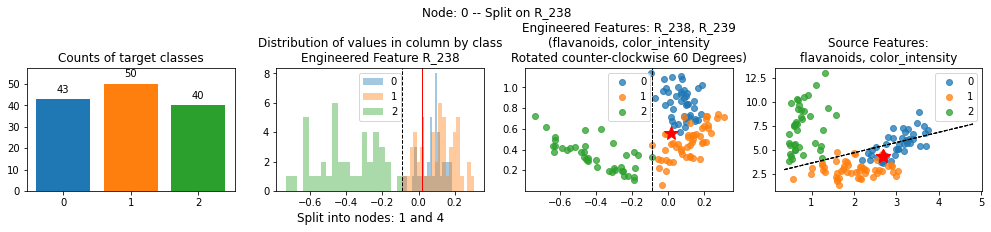

class_idx:  0
class_name:  0
match_ids:  [ True False  True  True  True False False  True False False False False
  True False False False  True  True False False False False False  True
 False False False False False  True False  True  True  True  True False
  True False False  True False  True False False False  True  True  True
 False  True  True False False  True  True  True False  True False  True
 False  True  True  True False  True  True False  True False  True  True
 False False False False False False  True False  True  True False False
 False  True  True  True False False False  True]
ids_for_class:  Int64Index([19, 16, 40, 22, 27,  2, 43, 10, 50, 48, 13, 23, 20, 15, 52,  3,  6,
            12, 14,  0, 46, 11, 35, 57, 41,  1, 42, 17, 38, 53, 34, 28, 31, 32,
            29, 25, 39, 58, 36, 21,  9, 47],
           dtype='int64')


19    0.498061
16    0.755456
40    0.553927
22    0.478923
27    0.591221
2     0.678570
43    0.376578
10    0.815322
50    0.776718
48    0.666387
13    0.643710
23    0.480432
20    0.512386
15    0.848884
52    0.781828
3     0.954657
6     0.689306
12    0.727315
14    0.959614
0     0.627032
46    0.572351
11    0.666785
35    0.528425
57    0.736629
41    0.514391
1     0.527854
42    0.623660
17    0.724285
38    0.465461
53    0.801307
34    0.532771
28    0.482065
31    0.902323
32    0.463660
29    0.545426
25    0.379670
39    0.463648
58    0.801816
36    0.475284
21    0.423360
9     0.735685
47    0.628634
Name: R_299, dtype: float64

class_idx:  1
class_name:  1
match_ids:  [False  True False False False  True  True False  True  True  True  True
 False  True  True  True False False  True  True  True  True  True False
  True  True  True  True  True False  True False False False False  True
 False  True  True False  True False  True  True  True False False False
  True False False  True  True False False False  True False  True False
  True False False False  True False False  True False  True False False
  True  True  True  True  True  True False  True False False  True  True
  True False False False  True  True  True False]
ids_for_class:  Int64Index([ 74, 108,  71,  83,  97, 118,  62,  59,  95,  96, 109,  73, 110,
            125, 116,  89,  64, 122, 124,  69,  85,  78, 100,  76, 107,  68,
             75,  84,  91, 119, 102,  65, 120, 105, 128, 114, 127,  99,  82,
             79, 115,  72,  77,  81,  88,  70,  87, 103,  67, 117],
           dtype='int64')


74     0.375002
108    0.104928
71     0.194851
83     0.342289
97     0.166670
118    0.180945
62     0.314955
59     0.133719
95     0.350575
96     0.216870
109    0.250221
73     0.425428
110    0.220921
125    0.136082
116    0.123597
89     0.160711
64     0.140810
122    0.080572
124    0.139848
69     0.280384
85     0.154887
78     0.333981
100    0.310397
76     0.277713
107    0.220519
68     0.316986
75     0.233174
84     0.215001
91     0.227302
119    0.102024
102    0.163329
65     0.393503
120    0.272290
105    0.106143
128    0.074216
114    0.149261
127    0.189444
99     0.113427
82     0.196726
79     0.156456
115    0.084275
72     0.246554
77     0.177347
81     0.356353
88     0.261305
70     0.356701
87     0.198753
103    0.099337
67     0.331398
117    0.070997
Name: R_299, dtype: float64

class_idx:  2
class_name:  2
match_ids:  [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]
ids_for_class:  Int64Index([], dtype='int64')


Series([], Name: R_299, dtype: float64)

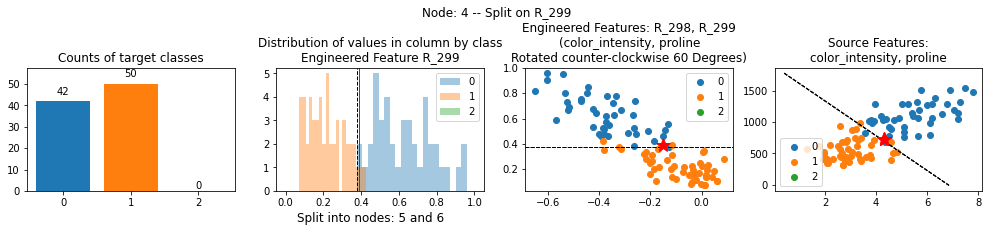

class_idx:  0
class_name:  0
match_ids:  [ True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
ids_for_class:  Int64Index([19, 16, 40, 22, 27,  2, 43, 10, 50, 48, 13, 23, 20, 15, 52,  3,  6,
            12, 14,  0, 46, 11, 35, 57, 41,  1, 42, 17, 38, 53, 34, 28, 31, 32,
            29, 25, 39, 58, 36, 21,  9, 47],
           dtype='int64')


19    0.319845
16    0.455509
40    0.220285
22    0.352328
27    0.294649
2     0.190114
43    0.237515
10    0.381970
50    0.178894
48    0.417941
13    0.506313
23    0.175499
20    0.363665
15    0.290538
52    0.149519
3     0.282956
6     0.530418
12    0.363439
14    0.384205
0     0.439213
46    0.393198
11    0.521518
35    0.282596
57    0.184407
41    0.311264
1     0.226405
42    0.276797
17    0.319113
38    0.241104
53    0.296152
34    0.352530
28    0.328425
31    0.277100
32    0.379517
29    0.417303
25    0.195081
39    0.400913
58    0.212570
36    0.254022
21    0.206713
9     0.320702
47    0.308431
Name: R_16, dtype: float64

class_idx:  1
class_name:  1
match_ids:  [False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False]
ids_for_class:  Int64Index([73, 65], dtype='int64')


73    0.060610
65    0.074545
Name: R_16, dtype: float64

class_idx:  2
class_name:  2
match_ids:  [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]
ids_for_class:  Int64Index([], dtype='int64')


Series([], Name: R_16, dtype: float64)

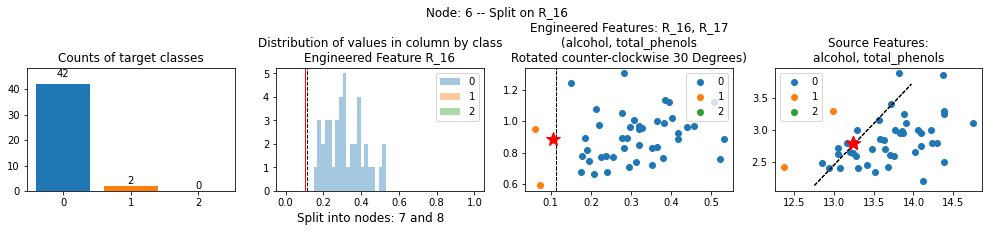

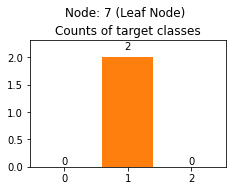



****************************************************************
Displaying decision path for row 44. Predicted: 1. Actual: 0
****************************************************************
Decision Path: [0 4 6 7]
class_idx:  0
class_name:  0
match_ids:  [ True False False False  True False False  True False  True False False
 False False False False  True False False False False False False  True
 False False False  True  True False False False False False False False
 False False  True False False False False False False  True  True False
  True False  True False  True  True False  True False False  True False
 False  True False False False False  True False False  True  True False
 False  True  True False False  True  True  True False False  True False
 False  True False False False  True  True False  True False False  True
  True False  True False False False  True False False False  True False
 False False False False False False False  True False False False  True
  True Fals

19    0.109166
16    0.044704
40    0.072812
22    0.182291
27    0.065703
2     0.098418
43    0.102685
10    0.105478
50   -0.009312
49   -0.093645
48    0.011064
13    0.187916
23    0.094704
20    0.089932
15   -0.071747
52    0.073638
3    -0.020008
6     0.020101
12    0.030935
14    0.025095
0     0.073851
46    0.145352
11    0.024812
35    0.101521
57    0.073244
41    0.116242
1     0.121085
42    0.165821
17    0.054902
38    0.152983
53   -0.016203
34    0.099217
28    0.144328
31    0.000624
32    0.150284
29    0.031690
25    0.167967
39    0.110695
58    0.081408
36    0.092596
21    0.058701
9    -0.029138
47    0.090319
Name: R_238, dtype: float64

class_idx:  1
class_name:  1
match_ids:  [False False  True False False False False False False False  True False
 False  True False False False  True False  True  True False  True False
  True  True  True False False  True  True False False  True  True  True
 False False False False  True  True  True  True  True False False  True
 False False False False False False  True False  True  True False False
  True False  True  True  True False False False False False False  True
 False False False  True  True False False False False  True False  True
 False False  True False False False False False False False  True False
 False  True False False  True False False False False False False  True
  True  True  True False False  True  True False  True False False False
 False False  True  True  True False False False  True  True  True False
 False]
ids_for_class:  Int64Index([ 74, 108,  71,  83,  97, 118,  62,  59,  95,  96, 109,  73, 110,
            125, 116,  89,  64, 122, 124,  69,  85,  78

74     0.112738
108    0.135133
71     0.210268
83    -0.088849
97     0.190691
118   -0.037387
62     0.015625
59    -0.034218
95     0.177691
96    -0.010639
109    0.273384
73     0.217072
110    0.202923
125    0.223972
116    0.123275
89     0.137263
64     0.072317
122    0.194708
124    0.279120
69     0.007841
85     0.125754
78     0.054356
100    0.110675
76    -0.006792
107    0.047984
68    -0.012746
75    -0.018015
84     0.135265
91    -0.052166
119    0.178899
102    0.138447
65     0.088009
120    0.209171
105    0.104552
128    0.240682
114    0.158581
127    0.143546
99     0.309950
82     0.101743
79     0.222721
115    0.214125
72     0.027703
77     0.028736
81     0.121385
88     0.074227
70    -0.046693
87     0.076773
103    0.121263
67    -0.017291
117    0.190070
Name: R_238, dtype: float64

class_idx:  2
class_name:  2
match_ids:  [False  True False  True False  True  True False  True False False  True
  True False  True  True False False  True False False  True False False
 False False False False False False False  True  True False False False
  True  True False  True False False False False False False False False
 False  True False  True False False False False False False False  True
 False False False False False  True False  True  True False False False
  True False False False False False False False  True False False False
  True False False  True  True False False  True False  True False False
 False False False  True False  True False  True  True  True False False
 False False False  True  True False False False False  True  True False
 False  True False False False False False False False False False False
  True]
ids_for_class:  Int64Index([135, 144, 131, 138, 158, 175, 145, 162, 156, 134, 163, 171, 159,
            166, 170, 155, 136, 165, 176, 130, 137, 152

135   -0.401005
144   -0.464678
131   -0.189760
138   -0.325078
158   -0.737585
175   -0.625486
145   -0.188756
162   -0.297862
156   -0.516147
134   -0.291314
163   -0.260404
171   -0.630841
159   -0.677329
166   -0.625786
170   -0.308770
155   -0.464707
136   -0.189905
165   -0.394588
176   -0.560511
130   -0.089112
137   -0.255004
152   -0.306204
153   -0.627725
173   -0.452986
143   -0.180087
132   -0.231806
154   -0.450184
133   -0.163261
139   -0.249093
149   -0.459338
157   -0.442795
142   -0.219206
150   -0.372701
147   -0.443175
148   -0.483253
177   -0.540890
167   -0.634507
169   -0.458584
140   -0.240737
172   -0.587010
Name: R_238, dtype: float64

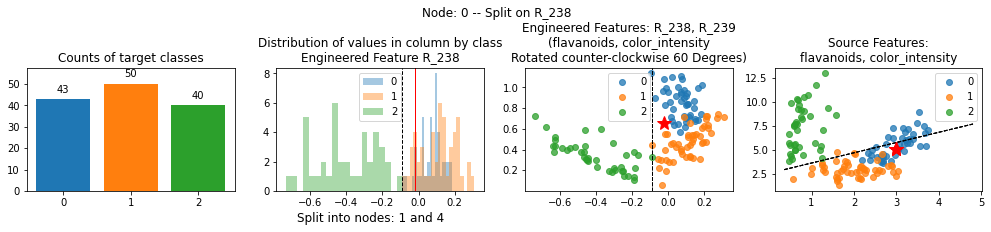

class_idx:  0
class_name:  0
match_ids:  [ True False  True  True  True False False  True False False False False
  True False False False  True  True False False False False False  True
 False False False False False  True False  True  True  True  True False
  True False False  True False  True False False False  True  True  True
 False  True  True False False  True  True  True False  True False  True
 False  True  True  True False  True  True False  True False  True  True
 False False False False False False  True False  True  True False False
 False  True  True  True False False False  True]
ids_for_class:  Int64Index([19, 16, 40, 22, 27,  2, 43, 10, 50, 48, 13, 23, 20, 15, 52,  3,  6,
            12, 14,  0, 46, 11, 35, 57, 41,  1, 42, 17, 38, 53, 34, 28, 31, 32,
            29, 25, 39, 58, 36, 21,  9, 47],
           dtype='int64')


19    0.498061
16    0.755456
40    0.553927
22    0.478923
27    0.591221
2     0.678570
43    0.376578
10    0.815322
50    0.776718
48    0.666387
13    0.643710
23    0.480432
20    0.512386
15    0.848884
52    0.781828
3     0.954657
6     0.689306
12    0.727315
14    0.959614
0     0.627032
46    0.572351
11    0.666785
35    0.528425
57    0.736629
41    0.514391
1     0.527854
42    0.623660
17    0.724285
38    0.465461
53    0.801307
34    0.532771
28    0.482065
31    0.902323
32    0.463660
29    0.545426
25    0.379670
39    0.463648
58    0.801816
36    0.475284
21    0.423360
9     0.735685
47    0.628634
Name: R_299, dtype: float64

class_idx:  1
class_name:  1
match_ids:  [False  True False False False  True  True False  True  True  True  True
 False  True  True  True False False  True  True  True  True  True False
  True  True  True  True  True False  True False False False False  True
 False  True  True False  True False  True  True  True False False False
  True False False  True  True False False False  True False  True False
  True False False False  True False False  True False  True False False
  True  True  True  True  True  True False  True False False  True  True
  True False False False  True  True  True False]
ids_for_class:  Int64Index([ 74, 108,  71,  83,  97, 118,  62,  59,  95,  96, 109,  73, 110,
            125, 116,  89,  64, 122, 124,  69,  85,  78, 100,  76, 107,  68,
             75,  84,  91, 119, 102,  65, 120, 105, 128, 114, 127,  99,  82,
             79, 115,  72,  77,  81,  88,  70,  87, 103,  67, 117],
           dtype='int64')


74     0.375002
108    0.104928
71     0.194851
83     0.342289
97     0.166670
118    0.180945
62     0.314955
59     0.133719
95     0.350575
96     0.216870
109    0.250221
73     0.425428
110    0.220921
125    0.136082
116    0.123597
89     0.160711
64     0.140810
122    0.080572
124    0.139848
69     0.280384
85     0.154887
78     0.333981
100    0.310397
76     0.277713
107    0.220519
68     0.316986
75     0.233174
84     0.215001
91     0.227302
119    0.102024
102    0.163329
65     0.393503
120    0.272290
105    0.106143
128    0.074216
114    0.149261
127    0.189444
99     0.113427
82     0.196726
79     0.156456
115    0.084275
72     0.246554
77     0.177347
81     0.356353
88     0.261305
70     0.356701
87     0.198753
103    0.099337
67     0.331398
117    0.070997
Name: R_299, dtype: float64

class_idx:  2
class_name:  2
match_ids:  [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]
ids_for_class:  Int64Index([], dtype='int64')


Series([], Name: R_299, dtype: float64)

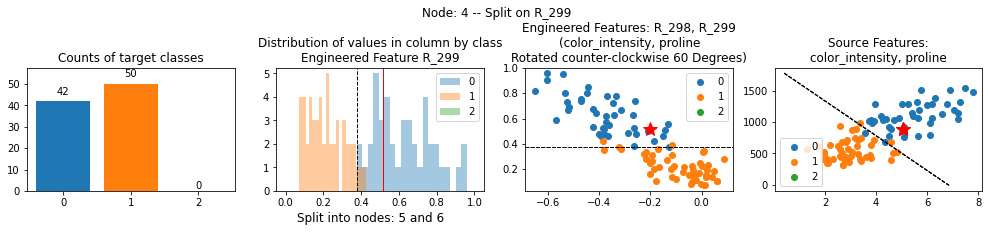

class_idx:  0
class_name:  0
match_ids:  [ True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
ids_for_class:  Int64Index([19, 16, 40, 22, 27,  2, 43, 10, 50, 48, 13, 23, 20, 15, 52,  3,  6,
            12, 14,  0, 46, 11, 35, 57, 41,  1, 42, 17, 38, 53, 34, 28, 31, 32,
            29, 25, 39, 58, 36, 21,  9, 47],
           dtype='int64')


19    0.319845
16    0.455509
40    0.220285
22    0.352328
27    0.294649
2     0.190114
43    0.237515
10    0.381970
50    0.178894
48    0.417941
13    0.506313
23    0.175499
20    0.363665
15    0.290538
52    0.149519
3     0.282956
6     0.530418
12    0.363439
14    0.384205
0     0.439213
46    0.393198
11    0.521518
35    0.282596
57    0.184407
41    0.311264
1     0.226405
42    0.276797
17    0.319113
38    0.241104
53    0.296152
34    0.352530
28    0.328425
31    0.277100
32    0.379517
29    0.417303
25    0.195081
39    0.400913
58    0.212570
36    0.254022
21    0.206713
9     0.320702
47    0.308431
Name: R_16, dtype: float64

class_idx:  1
class_name:  1
match_ids:  [False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False]
ids_for_class:  Int64Index([73, 65], dtype='int64')


73    0.060610
65    0.074545
Name: R_16, dtype: float64

class_idx:  2
class_name:  2
match_ids:  [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]
ids_for_class:  Int64Index([], dtype='int64')


Series([], Name: R_16, dtype: float64)

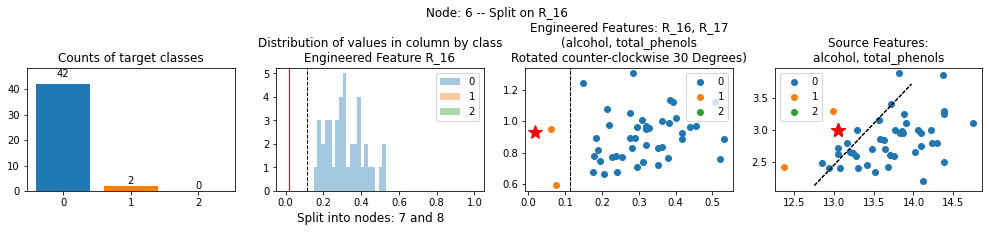

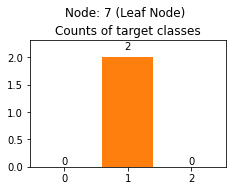



****************************************************************
Displaying decision path for row 24. Predicted: 1. Actual: 0
****************************************************************
Decision Path: [0 4 5]
class_idx:  0
class_name:  0
match_ids:  [ True False False False  True False False  True False  True False False
 False False False False  True False False False False False False  True
 False False False  True  True False False False False False False False
 False False  True False False False False False False  True  True False
  True False  True False  True  True False  True False False  True False
 False  True False False False False  True False False  True  True False
 False  True  True False False  True  True  True False False  True False
 False  True False False False  True  True False  True False False  True
  True False  True False False False  True False False False  True False
 False False False False False False False  True False False False  True
  True False 

19    0.109166
16    0.044704
40    0.072812
22    0.182291
27    0.065703
2     0.098418
43    0.102685
10    0.105478
50   -0.009312
49   -0.093645
48    0.011064
13    0.187916
23    0.094704
20    0.089932
15   -0.071747
52    0.073638
3    -0.020008
6     0.020101
12    0.030935
14    0.025095
0     0.073851
46    0.145352
11    0.024812
35    0.101521
57    0.073244
41    0.116242
1     0.121085
42    0.165821
17    0.054902
38    0.152983
53   -0.016203
34    0.099217
28    0.144328
31    0.000624
32    0.150284
29    0.031690
25    0.167967
39    0.110695
58    0.081408
36    0.092596
21    0.058701
9    -0.029138
47    0.090319
Name: R_238, dtype: float64

class_idx:  1
class_name:  1
match_ids:  [False False  True False False False False False False False  True False
 False  True False False False  True False  True  True False  True False
  True  True  True False False  True  True False False  True  True  True
 False False False False  True  True  True  True  True False False  True
 False False False False False False  True False  True  True False False
  True False  True  True  True False False False False False False  True
 False False False  True  True False False False False  True False  True
 False False  True False False False False False False False  True False
 False  True False False  True False False False False False False  True
  True  True  True False False  True  True False  True False False False
 False False  True  True  True False False False  True  True  True False
 False]
ids_for_class:  Int64Index([ 74, 108,  71,  83,  97, 118,  62,  59,  95,  96, 109,  73, 110,
            125, 116,  89,  64, 122, 124,  69,  85,  78

74     0.112738
108    0.135133
71     0.210268
83    -0.088849
97     0.190691
118   -0.037387
62     0.015625
59    -0.034218
95     0.177691
96    -0.010639
109    0.273384
73     0.217072
110    0.202923
125    0.223972
116    0.123275
89     0.137263
64     0.072317
122    0.194708
124    0.279120
69     0.007841
85     0.125754
78     0.054356
100    0.110675
76    -0.006792
107    0.047984
68    -0.012746
75    -0.018015
84     0.135265
91    -0.052166
119    0.178899
102    0.138447
65     0.088009
120    0.209171
105    0.104552
128    0.240682
114    0.158581
127    0.143546
99     0.309950
82     0.101743
79     0.222721
115    0.214125
72     0.027703
77     0.028736
81     0.121385
88     0.074227
70    -0.046693
87     0.076773
103    0.121263
67    -0.017291
117    0.190070
Name: R_238, dtype: float64

class_idx:  2
class_name:  2
match_ids:  [False  True False  True False  True  True False  True False False  True
  True False  True  True False False  True False False  True False False
 False False False False False False False  True  True False False False
  True  True False  True False False False False False False False False
 False  True False  True False False False False False False False  True
 False False False False False  True False  True  True False False False
  True False False False False False False False  True False False False
  True False False  True  True False False  True False  True False False
 False False False  True False  True False  True  True  True False False
 False False False  True  True False False False False  True  True False
 False  True False False False False False False False False False False
  True]
ids_for_class:  Int64Index([135, 144, 131, 138, 158, 175, 145, 162, 156, 134, 163, 171, 159,
            166, 170, 155, 136, 165, 176, 130, 137, 152

135   -0.401005
144   -0.464678
131   -0.189760
138   -0.325078
158   -0.737585
175   -0.625486
145   -0.188756
162   -0.297862
156   -0.516147
134   -0.291314
163   -0.260404
171   -0.630841
159   -0.677329
166   -0.625786
170   -0.308770
155   -0.464707
136   -0.189905
165   -0.394588
176   -0.560511
130   -0.089112
137   -0.255004
152   -0.306204
153   -0.627725
173   -0.452986
143   -0.180087
132   -0.231806
154   -0.450184
133   -0.163261
139   -0.249093
149   -0.459338
157   -0.442795
142   -0.219206
150   -0.372701
147   -0.443175
148   -0.483253
177   -0.540890
167   -0.634507
169   -0.458584
140   -0.240737
172   -0.587010
Name: R_238, dtype: float64

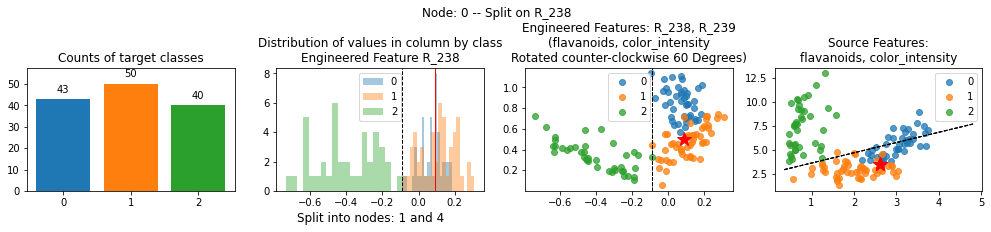

class_idx:  0
class_name:  0
match_ids:  [ True False  True  True  True False False  True False False False False
  True False False False  True  True False False False False False  True
 False False False False False  True False  True  True  True  True False
  True False False  True False  True False False False  True  True  True
 False  True  True False False  True  True  True False  True False  True
 False  True  True  True False  True  True False  True False  True  True
 False False False False False False  True False  True  True False False
 False  True  True  True False False False  True]
ids_for_class:  Int64Index([19, 16, 40, 22, 27,  2, 43, 10, 50, 48, 13, 23, 20, 15, 52,  3,  6,
            12, 14,  0, 46, 11, 35, 57, 41,  1, 42, 17, 38, 53, 34, 28, 31, 32,
            29, 25, 39, 58, 36, 21,  9, 47],
           dtype='int64')


19    0.498061
16    0.755456
40    0.553927
22    0.478923
27    0.591221
2     0.678570
43    0.376578
10    0.815322
50    0.776718
48    0.666387
13    0.643710
23    0.480432
20    0.512386
15    0.848884
52    0.781828
3     0.954657
6     0.689306
12    0.727315
14    0.959614
0     0.627032
46    0.572351
11    0.666785
35    0.528425
57    0.736629
41    0.514391
1     0.527854
42    0.623660
17    0.724285
38    0.465461
53    0.801307
34    0.532771
28    0.482065
31    0.902323
32    0.463660
29    0.545426
25    0.379670
39    0.463648
58    0.801816
36    0.475284
21    0.423360
9     0.735685
47    0.628634
Name: R_299, dtype: float64

class_idx:  1
class_name:  1
match_ids:  [False  True False False False  True  True False  True  True  True  True
 False  True  True  True False False  True  True  True  True  True False
  True  True  True  True  True False  True False False False False  True
 False  True  True False  True False  True  True  True False False False
  True False False  True  True False False False  True False  True False
  True False False False  True False False  True False  True False False
  True  True  True  True  True  True False  True False False  True  True
  True False False False  True  True  True False]
ids_for_class:  Int64Index([ 74, 108,  71,  83,  97, 118,  62,  59,  95,  96, 109,  73, 110,
            125, 116,  89,  64, 122, 124,  69,  85,  78, 100,  76, 107,  68,
             75,  84,  91, 119, 102,  65, 120, 105, 128, 114, 127,  99,  82,
             79, 115,  72,  77,  81,  88,  70,  87, 103,  67, 117],
           dtype='int64')


74     0.375002
108    0.104928
71     0.194851
83     0.342289
97     0.166670
118    0.180945
62     0.314955
59     0.133719
95     0.350575
96     0.216870
109    0.250221
73     0.425428
110    0.220921
125    0.136082
116    0.123597
89     0.160711
64     0.140810
122    0.080572
124    0.139848
69     0.280384
85     0.154887
78     0.333981
100    0.310397
76     0.277713
107    0.220519
68     0.316986
75     0.233174
84     0.215001
91     0.227302
119    0.102024
102    0.163329
65     0.393503
120    0.272290
105    0.106143
128    0.074216
114    0.149261
127    0.189444
99     0.113427
82     0.196726
79     0.156456
115    0.084275
72     0.246554
77     0.177347
81     0.356353
88     0.261305
70     0.356701
87     0.198753
103    0.099337
67     0.331398
117    0.070997
Name: R_299, dtype: float64

class_idx:  2
class_name:  2
match_ids:  [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]
ids_for_class:  Int64Index([], dtype='int64')


Series([], Name: R_299, dtype: float64)

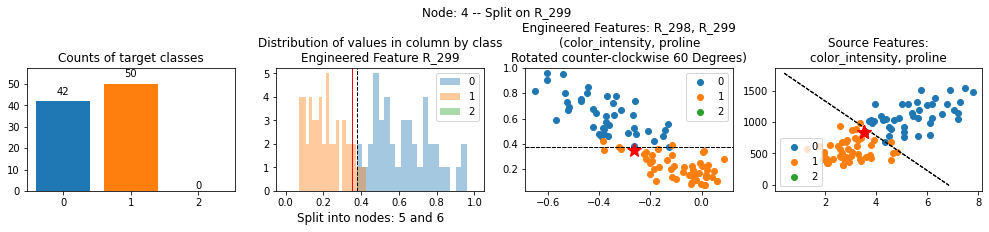

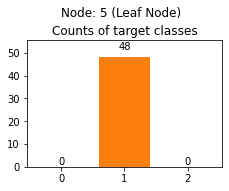

In [9]:
tree_viewer.graph_incorrect_rows(X_test_extended, y_test, y_pred, max_rows_shown=5)

## Visualize a full Decision Tree

In [10]:
#tree_viewer.graph_tree(show_log_scale=False, show_combined_2d_space=True)